In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [31]:
dataset = pd.read_csv('College_Admission.csv')
dataset.head(3)

,student_id,age,gender,category,state,preferred_stream,entrance_exam,entrance_score,board_percentage,extracurricular_score,admission_probability,admission_status,scholarship_eligibility
0,250.99,17,other,general,odisha,management,cet,30,95.58,2,0.387,admitted,yes
1,250.99,20,other,ews,gujarat,agriculture,none,0,75.45,2,0.221,rejected,no
2,250.99,19,female,sc,uttar pradesh,pharmacy,cet,120,75.36,10,0.446,rejected,no


In [32]:
dataset.isnull().sum()

,0
student_id,0
age,0
gender,0
category,0
state,0
preferred_stream,0
entrance_exam,0
entrance_score,0
board_percentage,0
extracurricular_score,0


/tmp/ipython-input-564582522.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["entrance_score"])


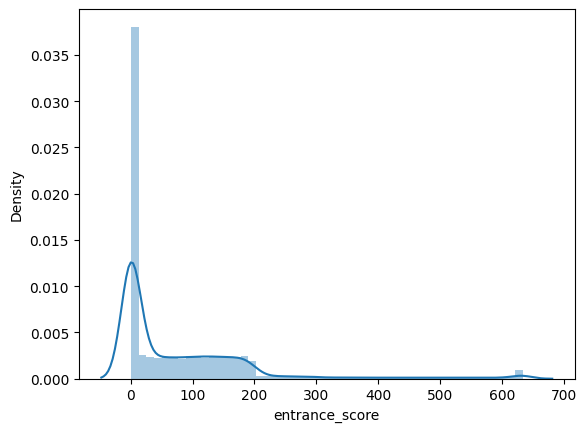

In [33]:
sns.distplot(dataset["entrance_score"])
plt.show()

In [34]:
q1 = dataset["entrance_score"].quantile(0.25)
q3= dataset["entrance_score"].quantile(0.75)
iqr = q3-q1


In [35]:
min_range = q1-(1.5*iqr)
max_range = q3+(1.5*iqr)
min_range,max_range

(np.float64(-189.0), np.float64(315.0))

In [36]:
new_dataset = dataset[
    (dataset["entrance_score"] >= min_range) &
    (dataset["entrance_score"] <= max_range)
]
new_dataset

,student_id,age,gender,category,state,preferred_stream,entrance_exam,entrance_score,board_percentage,extracurricular_score,admission_probability,admission_status,scholarship_eligibility
0,250.99,17,other,general,odisha,management,cet,30,95.58,2,0.387,admitted,yes
1,250.99,20,other,ews,gujarat,agriculture,none,0,75.45,2,0.221,rejected,no
2,250.99,19,female,sc,uttar pradesh,pharmacy,cet,120,75.36,10,0.446,rejected,no
3,250.99,18,male,ews,meghalaya,arts,cet,179,52.49,2,0.174,admitted,no
4,250.99,18,male,sc,rajasthan,engineering,jee,295,92.48,7,0.634,admitted,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,24750.01,18,female,obc,uttar pradesh,law,none,0,82.67,2,0.273,rejected,no
24996,24750.01,20,other,ews,andhra pradesh,management,none,0,60.66,10,0.258,rejected,no
24997,24750.01,17,male,obc,manipur,pharmacy,cet,195,91.87,6,0.544,rejected,no
24998,24750.01,19,male,ews,andhra pradesh,management,cet,66,50.44,9,0.209,rejected,no


/tmp/ipython-input-1473163822.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_dataset["entrance_score"])


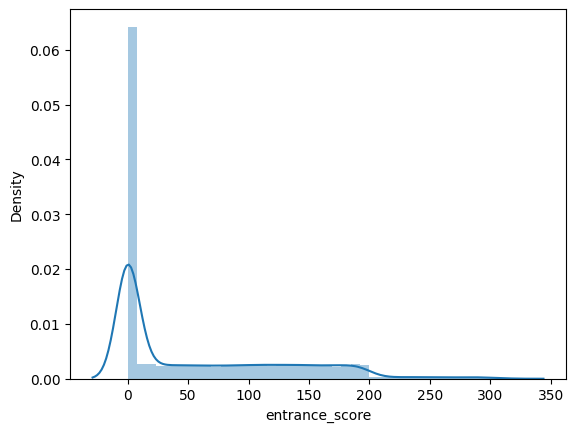

In [37]:
sns.distplot(new_dataset["entrance_score"])
plt.show()

In [38]:
from sklearn.preprocessing import FunctionTransformer

In [39]:
ft = FunctionTransformer(func=np.log1p)

In [40]:
new_dataset["entrance_score_ft"] = ft.fit_transform(new_dataset[["entrance_score"]])

/tmp/ipython-input-1220905661.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dataset["entrance_score_ft"] = ft.fit_transform(new_dataset[["entrance_score"]])


In [41]:
new_dataset

,student_id,age,gender,category,state,preferred_stream,entrance_exam,entrance_score,board_percentage,extracurricular_score,admission_probability,admission_status,scholarship_eligibility,entrance_score_ft
0,250.99,17,other,general,odisha,management,cet,30,95.58,2,0.387,admitted,yes,3.433987
1,250.99,20,other,ews,gujarat,agriculture,none,0,75.45,2,0.221,rejected,no,0.000000
2,250.99,19,female,sc,uttar pradesh,pharmacy,cet,120,75.36,10,0.446,rejected,no,4.795791
3,250.99,18,male,ews,meghalaya,arts,cet,179,52.49,2,0.174,admitted,no,5.192957
4,250.99,18,male,sc,rajasthan,engineering,jee,295,92.48,7,0.634,admitted,yes,5.690359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,24750.01,18,female,obc,uttar pradesh,law,none,0,82.67,2,0.273,rejected,no,0.000000
24996,24750.01,20,other,ews,andhra pradesh,management,none,0,60.66,10,0.258,rejected,no,0.000000
24997,24750.01,17,male,obc,manipur,pharmacy,cet,195,91.87,6,0.544,rejected,no,5.278115
24998,24750.01,19,male,ews,andhra pradesh,management,cet,66,50.44,9,0.209,rejected,no,4.204693


/tmp/ipython-input-3837565088.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_dataset["entrance_score"])
/tmp/ipython-input-3837565088.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_dataset["entrance_score_ft"])


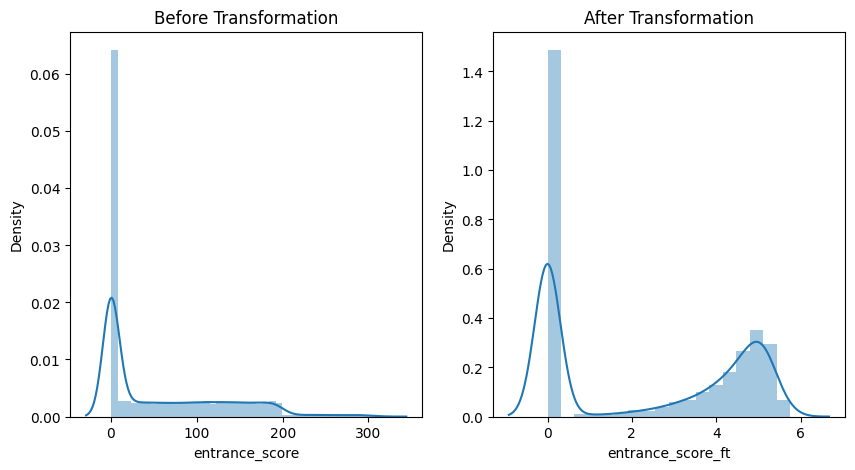

In [42]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(new_dataset["entrance_score"])
plt.title("Before Transformation")

plt.subplot(1,2,2)
sns.distplot(new_dataset["entrance_score_ft"])
plt.title("After Transformation")
plt.show()

In [43]:
ft1 = FunctionTransformer(func = lambda x: x**2)
new_dataset["entrance_score_ft1"] = ft1.fit_transform(new_dataset[["entrance_score"]])

/tmp/ipython-input-773464866.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dataset["entrance_score_ft1"] = ft1.fit_transform(new_dataset[["entrance_score"]])


In [44]:
new_dataset

,student_id,age,gender,category,state,preferred_stream,entrance_exam,entrance_score,board_percentage,extracurricular_score,admission_probability,admission_status,scholarship_eligibility,entrance_score_ft,entrance_score_ft1
0,250.99,17,other,general,odisha,management,cet,30,95.58,2,0.387,admitted,yes,3.433987,900
1,250.99,20,other,ews,gujarat,agriculture,none,0,75.45,2,0.221,rejected,no,0.000000,0
2,250.99,19,female,sc,uttar pradesh,pharmacy,cet,120,75.36,10,0.446,rejected,no,4.795791,14400
3,250.99,18,male,ews,meghalaya,arts,cet,179,52.49,2,0.174,admitted,no,5.192957,32041
4,250.99,18,male,sc,rajasthan,engineering,jee,295,92.48,7,0.634,admitted,yes,5.690359,87025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,24750.01,18,female,obc,uttar pradesh,law,none,0,82.67,2,0.273,rejected,no,0.000000,0
24996,24750.01,20,other,ews,andhra pradesh,management,none,0,60.66,10,0.258,rejected,no,0.000000,0
24997,24750.01,17,male,obc,manipur,pharmacy,cet,195,91.87,6,0.544,rejected,no,5.278115,38025
24998,24750.01,19,male,ews,andhra pradesh,management,cet,66,50.44,9,0.209,rejected,no,4.204693,4356


/tmp/ipython-input-1934172221.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_dataset["entrance_score"])
/tmp/ipython-input-1934172221.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_dataset["entrance_score_ft1"])


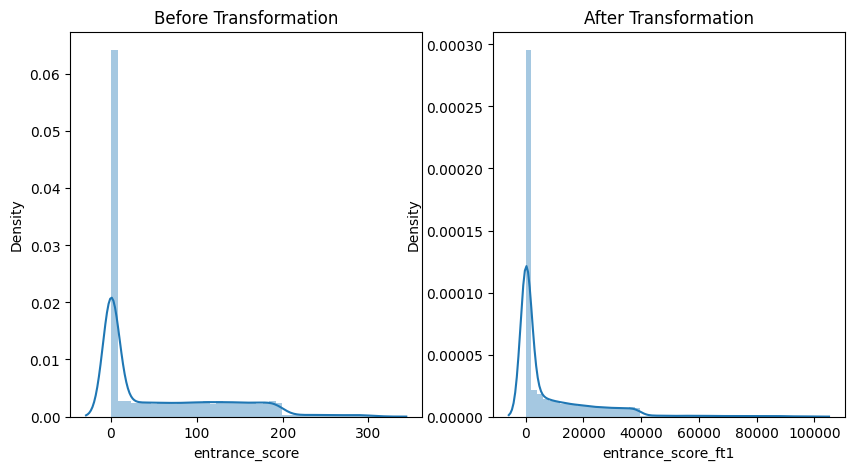

In [45]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(new_dataset["entrance_score"])
plt.title("Before Transformation")

plt.subplot(1,2,2)
sns.distplot(new_dataset["entrance_score_ft1"])
plt.title("After Transformation")
plt.show()